# A basic cpop demonstration

## Installing cpop

In [1]:
install.packages(pkgs=c("memoise","sets","cpop"))

Installing packages into ‘/home/grosedj/R-packages’
(as ‘lib’ is unspecified)

Warning message:
“package ‘cpop’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


## Using cpop

In [2]:
library(cpop)

Loading required package: crops

Registered S3 method overwritten by 'ggplot2':
  method        from
  print.element sets

Loading required package: pacman


Attaching package: ‘cpop’


The following objects are masked from ‘package:stats’:

    fitted, simulate


The following object is masked from ‘package:methods’:

    show




Generate some data

In [3]:
set.seed(0)
x <- seq(0,1,0.01)
n <- length(x)
sigma <- rep(0.1,n)
mu <- c(2*x[1:floor(n/2)],2 - 2*x[(floor(n/2)+1):n])
y <- rnorm(n,mu,sigma)

Use the locations in x

In [4]:
res <- cpop(y,x,beta=2*log(length(y)),sd=sigma)

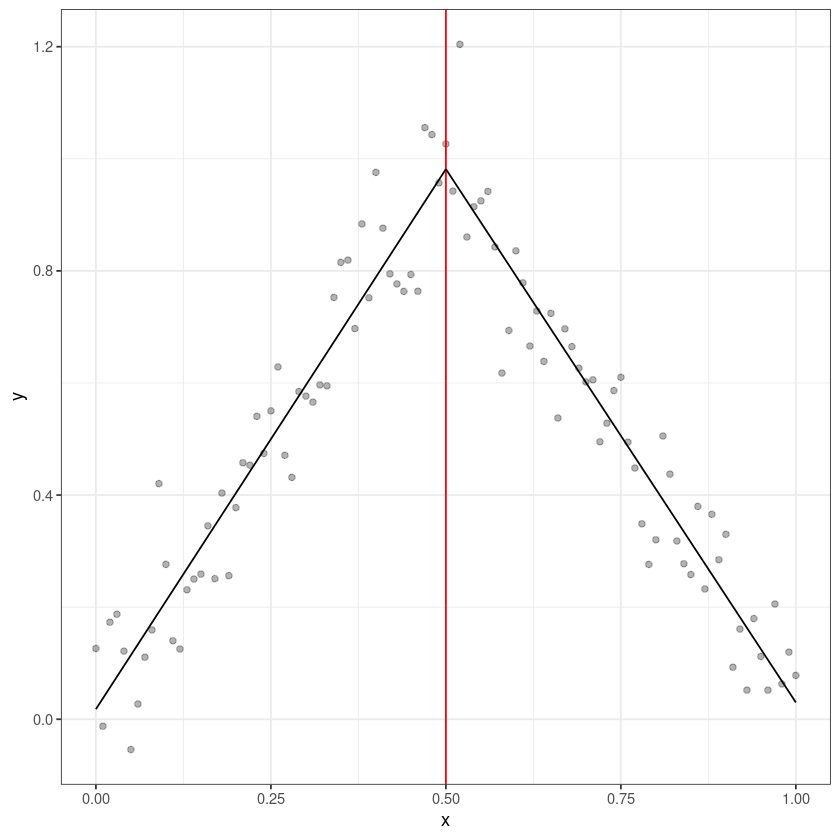

In [5]:
plot(res)

Now without locations (note explicit paramater names)

In [6]:
res <- cpop(y,beta=2*log(length(y)),sd=sigma)

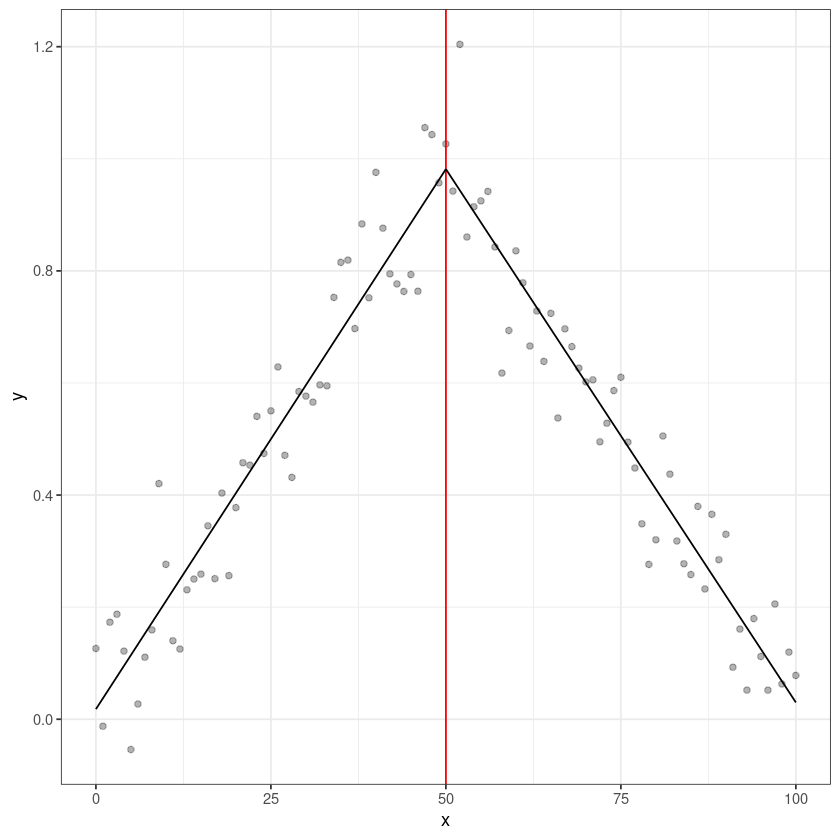

In [7]:
plot(res)

Stretch the end of the data

In [8]:
x[75:101] <- x[75:101] + seq(from=0,by=0.2,length.out=27)

In [9]:
res <- cpop(y,x,beta=2*log(length(y)),sd=sigma)

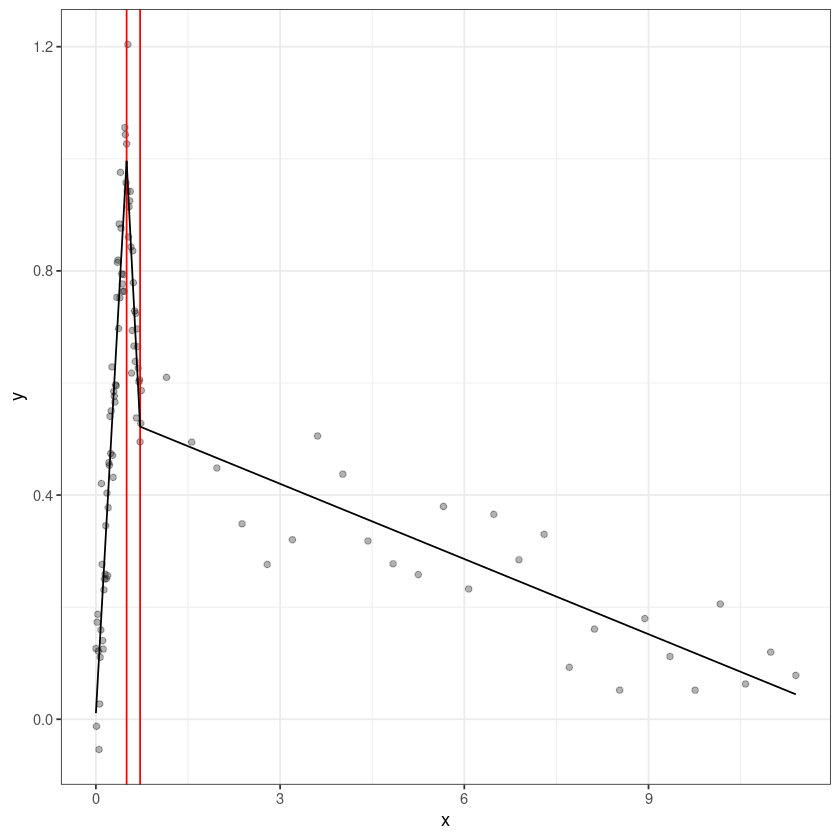

In [10]:
# stretch the end of the data
x[75:101] <- x[75:101] + seq(from=0,by=0.2,length.out=27)
res <- cpop(y,x,beta=2*log(length(y)),sd=sigma)
plot(res)

In [11]:
print(head(estimate(res,x)))

     x      y_hat
1 0.00 0.01087395
2 0.01 0.03058412
3 0.02 0.05029430
4 0.03 0.07000447
5 0.04 0.08971465
6 0.05 0.10942482


In [12]:
print(fitted(res))

    x0         y0    x1         y1    gradient  intercept       RSS
1 0.00 0.01087395  0.50 0.99638270  1.97101751 0.01087395 0.4096027
2 0.50 0.99638270  0.72 0.52198590 -2.15634912 2.07455726 0.1732195
3 0.72 0.52198590 11.40 0.04434788 -0.04472266 0.55418621 0.1655228


In [13]:
print(changepoints(res))

  location
1     0.50
2     0.72


In [14]:
res <- cpop.crops(y,x,sd=sigma,beta_min=0.2*2*log(length(y)),beta_max=1.5*2*log(length(y)))

        beta       Qm         Q  m cpt.1 cpt.2 cpt.3 cpt.4 cpt.5 cpt.6 cpt.7
1   1.846048 24.83249  63.59950 21  0.04  0.05  0.09  0.11  0.26  0.27  0.40
2   1.970631 30.72207  66.19342 18  0.04  0.05  0.09  0.11  0.26  0.27  0.40
3   2.005932 36.65628  66.74526 15  0.04  0.05  0.09  0.11  0.26  0.27  0.40
4   2.076534 40.79756  67.79250 13  0.04  0.05  0.09  0.11  0.26  0.27  0.40
5   2.130423 42.88588  68.45096 12  0.07  0.09  0.11  0.26  0.27  0.40  0.46
6   2.290358 42.88588  70.37017 12  0.07  0.09  0.11  0.26  0.27  0.40  0.46
7   2.290358 42.88588  70.37017 12  0.07  0.09  0.11  0.26  0.27  0.40  0.46
8   2.354507 47.46660  71.01166 10  0.07  0.09  0.11  0.40  0.46  0.47  0.51
9   2.631684 54.65841  73.08020  7  0.07  0.09  0.11  0.40  0.46  0.47  0.73
10  4.032863 54.65841  82.88845  7  0.07  0.09  0.11  0.40  0.46  0.47  0.73
11  4.035216 70.78986  82.89551  3  0.52  0.58  0.74    NA    NA    NA    NA
12 13.845362 74.83449 102.52522  2  0.50  0.72    NA    NA    NA    NA    NA

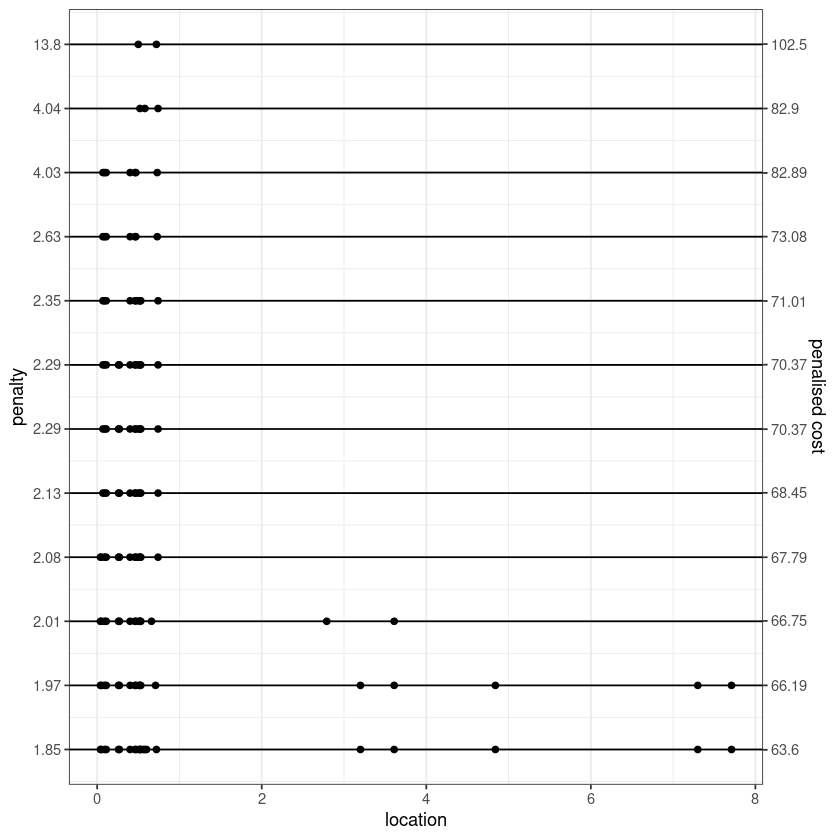

In [15]:
print(segmentations(res))
plot(res)

In [16]:
print(segmentations(res))

        beta       Qm         Q  m cpt.1 cpt.2 cpt.3 cpt.4 cpt.5 cpt.6 cpt.7
1   1.846048 24.83249  63.59950 21  0.04  0.05  0.09  0.11  0.26  0.27  0.40
2   1.970631 30.72207  66.19342 18  0.04  0.05  0.09  0.11  0.26  0.27  0.40
3   2.005932 36.65628  66.74526 15  0.04  0.05  0.09  0.11  0.26  0.27  0.40
4   2.076534 40.79756  67.79250 13  0.04  0.05  0.09  0.11  0.26  0.27  0.40
5   2.130423 42.88588  68.45096 12  0.07  0.09  0.11  0.26  0.27  0.40  0.46
6   2.290358 42.88588  70.37017 12  0.07  0.09  0.11  0.26  0.27  0.40  0.46
7   2.290358 42.88588  70.37017 12  0.07  0.09  0.11  0.26  0.27  0.40  0.46
8   2.354507 47.46660  71.01166 10  0.07  0.09  0.11  0.40  0.46  0.47  0.51
9   2.631684 54.65841  73.08020  7  0.07  0.09  0.11  0.40  0.46  0.47  0.73
10  4.032863 54.65841  82.88845  7  0.07  0.09  0.11  0.40  0.46  0.47  0.73
11  4.035216 70.78986  82.89551  3  0.52  0.58  0.74    NA    NA    NA    NA
12 13.845362 74.83449 102.52522  2  0.50  0.72    NA    NA    NA    NA    NA

In [17]:
res <- cpop.crops(y,x,sd=sigma,beta_min=0.2*2*log(length(y)),beta_max=1.5*2*log(length(y)))

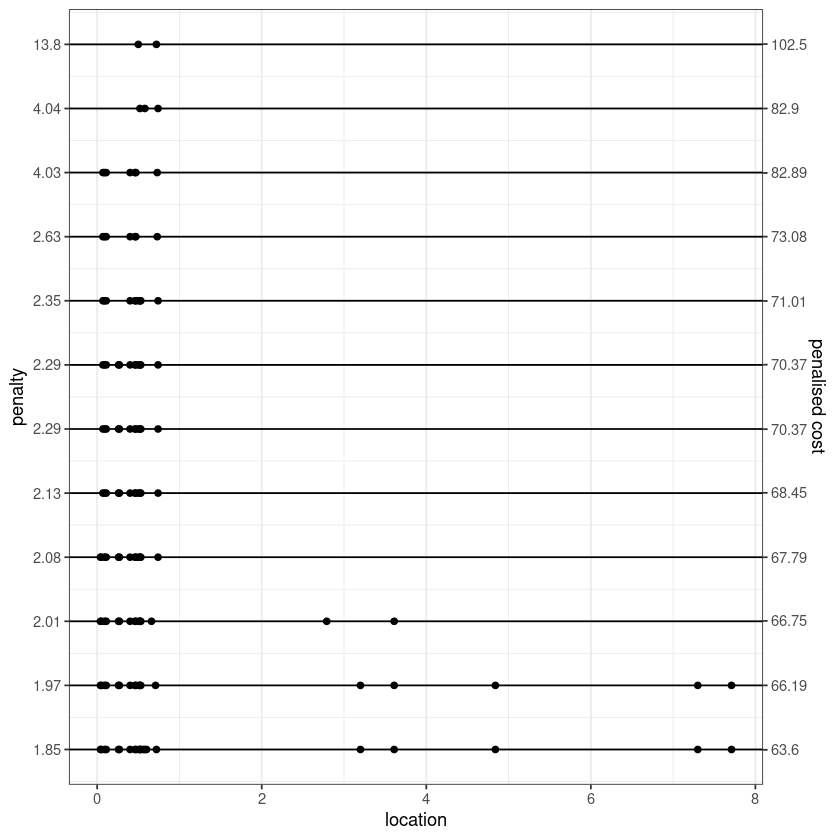

In [18]:
plot(res)